## Exploratory data analysis (EDA)

In [1]:
# libs importations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# link of dataset : https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population

In [2]:
# load training dataset
training_data = pd.read_csv('data/energy_training.csv')
# load test dataset
test_data = pd.read_csv('data/energy_test.csv')


In [3]:
# show an extract of training data
training_data.head(5)

,Id,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


#### Variables quantitatives et leurs unités :

- Energy_consumption : Quantité d'énergie consommée pour le type de source d'énergie spécifique, mesurée en quadrillions de British thermal units (quad Btu). 1 quad Btu équivaut à 
10^15 Btu.

- Energy_production : Quantité d'énergie produite pour le type de source d'énergie spécifique, également mesurée en quadrillions de British thermal units (quad Btu).

- GDP : Produit intérieur brut (PIB) du pays mesuré en milliards de dollars en parité de pouvoir d'achat de 2015 (Billion 2015$ PPP).

- Population : Population du pays en millions de personnes (Mperson).

- Energy_intensity_per_capita : Intensité énergétique par habitant, qui mesure l'inefficacité énergétique d'une économie. Elle est calculée en unités d'énergie par personne, mesurée en millions de British thermal units par personne (MMBtu/person).

- Energy_intensity_by_GDP : Intensité énergétique par unité de PIB, qui est un autre indicateur d'inefficacité énergétique. Elle est calculée en unités d'énergie par unité de PIB, mesurée en milliers de Btu par dollar du PIB en parité de pouvoir d'achat de 2015 (1000 Btu/2015$ GDP PPP).

- CO2_emission : Quantité de CO₂ émise, mesurée en millions de tonnes de CO₂ (MMtonnes CO₂)

In [4]:
# show an extract of test data
test_data.head(5)

,Id,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,39816,Reunion,all_energy_types,2008,0.042565,0.008957,21.0127,816.325,52.142568,2.025693,2.562226
1,39817,Reunion,coal,2008,0.000000,0.000000,21.0127,816.325,52.142568,2.025693,0.000000
2,39818,Reunion,natural_gas,2008,0.000000,0.000000,21.0127,816.325,52.142568,2.025693,0.000000
3,39819,Reunion,petroleum_n_other_liquids,2008,0.033608,0.000000,21.0127,816.325,52.142568,2.025693,2.562226
4,39820,Reunion,nuclear,2008,NaN,NaN,21.0127,816.325,52.142568,2.025693,0.000000


In [5]:
# print dataset shape
print(f"training_data data shape: {training_data.shape}")
# print dataset shape
print(f"test_data data shape: {test_data.shape}")

training_data data shape: (39816, 11)
test_data data shape: (15624, 11)


1. Inspection of training data

In [ ]:
# List of drop column
cols_to_drop = ['Id']
# drop column
training_data_cleaned = training_data.drop(columns=cols_to_drop)
# Stats clean data
print(training_data_cleaned.describe())

               Year  Energy_consumption  Energy_production           GDP  \
count  39816.000000        31279.000000       3.127900e+04  26274.000000   
mean    1993.867089            1.374745       1.372467e+00    705.167540   
std        8.293845           13.570908       1.346456e+01   4785.443455   
min     1980.000000           -0.163438      -1.000000e-39      0.124958   
25%     1987.000000            0.000000       0.000000e+00      8.718240   
50%     1994.000000            0.013892       2.831476e-04     42.590700   
75%     2001.000000            0.185250       9.774674e-02    243.694700   
max     2008.000000          499.785999       4.953210e+02  90624.603666   

         Population  Energy_intensity_per_capita  Energy_intensity_by_GDP  \
count  3.224400e+04                 35562.000000             35562.000000   
mean   5.926655e+04                    68.883691                 3.682533   
std    4.261267e+05                   115.053418                 5.170068   
min    

In [7]:
# missing values 
missing_values = training_data.isnull().sum()
print(missing_values[missing_values > 0])

Energy_consumption              8537
Energy_production               8537
GDP                            13542
Population                      7572
Energy_intensity_per_capita     4254
Energy_intensity_by_GDP         4254
CO2_emission                    3414
dtype: int64


In [8]:
# Print the age % of NaN values
energy_nan_percent = training_data['Energy_consumption'].isna().mean() * 100
print(f"Il y a {energy_nan_percent:.2f}% de valeur pour Energy_consumption manquante")

energy_production_nan_percent = training_data['Energy_production'].isna().mean() * 100
print(f"Il y a {energy_production_nan_percent:.2f}% de valeur pour Energy_production manquante")

gdp_nan_percent = training_data['GDP'].isna().mean() * 100
print(f"Il y a {gdp_nan_percent:.2f}% de valeur pour GDP manquante")

population_nan_percent = training_data['Population'].isna().mean() * 100
print(f"Il y a {population_nan_percent:.2f}% de valeur pour Population manquante")

Energy_intensity_per_capita_nan_percent = training_data['Energy_intensity_per_capita'].isna().mean() * 100
print(f"Il y a {Energy_intensity_per_capita_nan_percent:.2f}% de valeur pour Energy_intensity_per_capita manquante")

Energy_intensity_by_GDP_nan_percent = training_data['Energy_intensity_by_GDP'].isna().mean() * 100
print(f"Il y a {Energy_intensity_by_GDP_nan_percent:.2f}% de valeur pour Energy_intensity_by_GDP manquante")

CO2_emission_nan_percent = training_data['CO2_emission'].isna().mean() * 100
print(f"Il y a {CO2_emission_nan_percent:.2f}% de valeur pour CO2_emission manquante")

Il y a 21.44% de valeur pour Energy_consumption manquante
Il y a 21.44% de valeur pour Energy_production manquante
Il y a 34.01% de valeur pour GDP manquante
Il y a 19.02% de valeur pour Population manquante
Il y a 10.68% de valeur pour Energy_intensity_per_capita manquante
Il y a 10.68% de valeur pour Energy_intensity_by_GDP manquante
Il y a 8.57% de valeur pour CO2_emission manquante


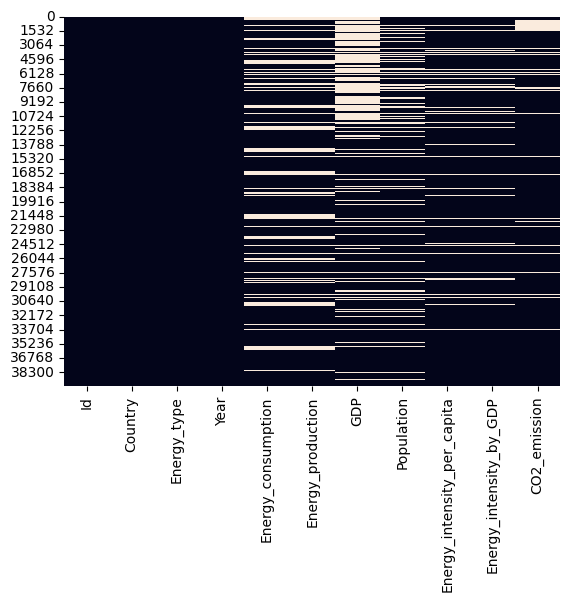

In [9]:
# visualize missing values
sns.heatmap(training_data.isnull(), cbar=False)
plt.show()

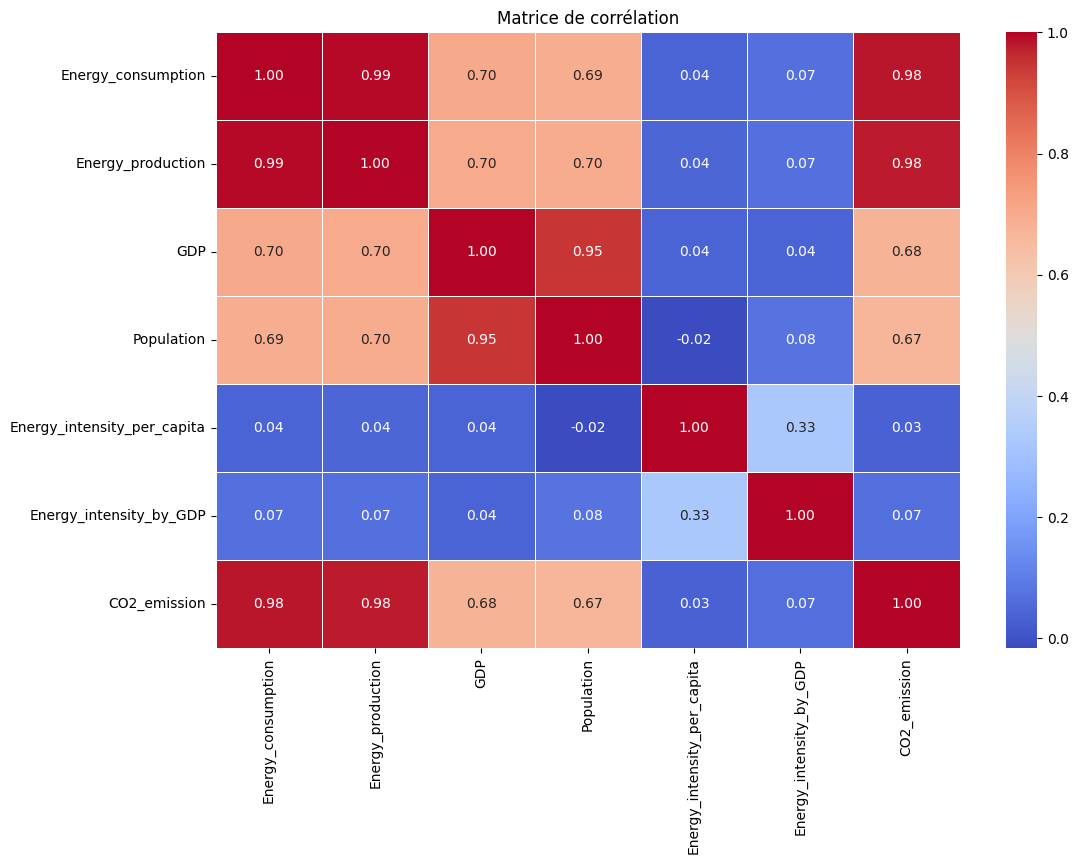

In [25]:
cols_to_drop = ['Id','Year']
training_data_cleaned = training_data.drop(columns=cols_to_drop)
# Calcul of correlations
numeric_columns = training_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculer la matrice de corrélation pour les colonnes numériques
correlation_matrix = training_data_cleaned[numeric_columns].corr()

# Afficher la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()



La matrice de corrélation montre la corrélation entre les différentes variables. Les couleurs indiquent la force de la corrélation (positive ou négative). Elle me permet de voir la force et la direction des relations entre les différentes mesures comme la consommation d'énergie, les émissions de CO₂, le PIB, et la population des pays. Par exemple, je remarque une forte corrélation positive entre la consommation d'énergie et les émissions de CO₂, ce qui suggère que plus un pays consomme d'énergie, plus il émet de CO₂. Cela confirme le lien direct entre les deux variables et leur impact environnemental.

J’ai également noté la corrélation entre la population et la consommation énergétique, qui indique que des pays plus peuplés tendent à consommer davantage d’énergie. Cette visualisation m’aide à identifier les variables qui apportent des informations similaires, ce qui sera utile pour éviter la redondance de données dans mon modèle de clustering K-Means

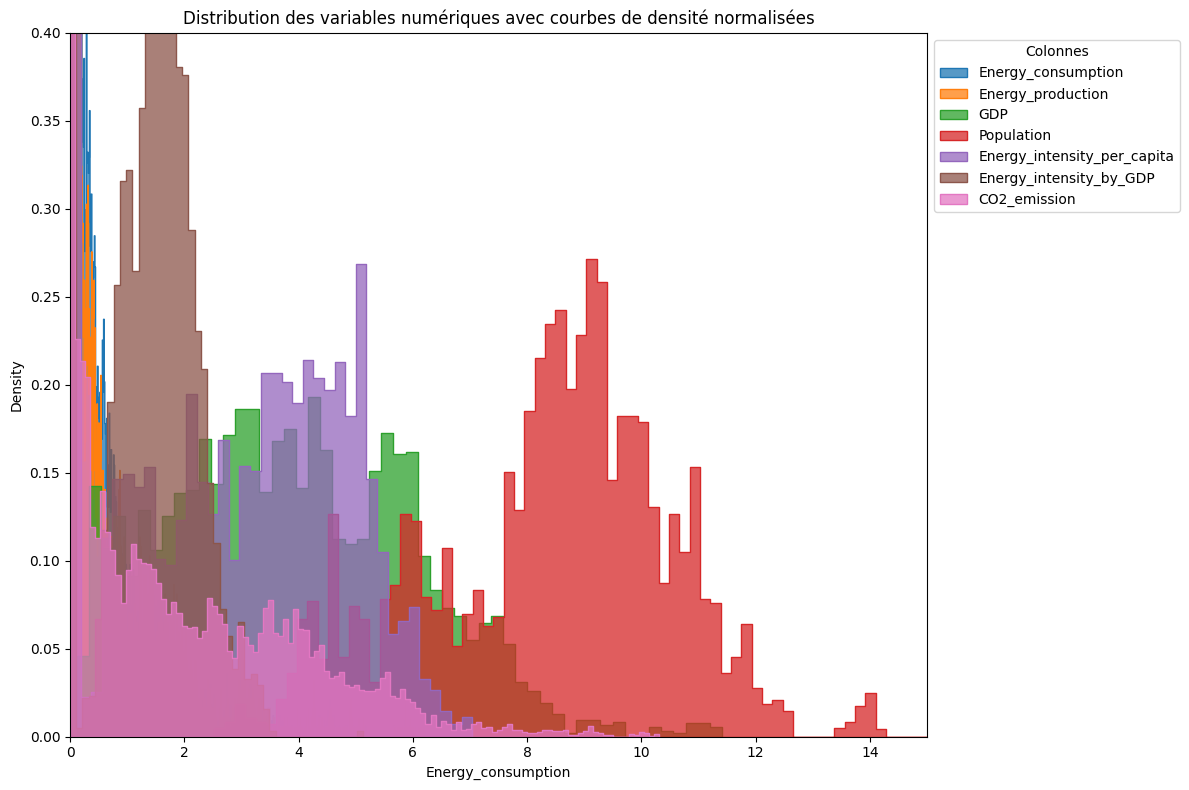

In [26]:
# List of column for distribution analysing
numeric_columns = ['Energy_consumption', 'Energy_production', 'GDP', 'Population', 
                   'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']

training_data_log = training_data[numeric_columns].apply(lambda x: np.log1p(x))

plt.figure(figsize=(12, 8))

for col in numeric_columns:
    sns.histplot(training_data_log[col], kde=False, label=col, stat='density', element='step')

plt.xlim(0, 15) 
plt.ylim(0, 0.4) 
plt.title('Distribution des variables numériques avec courbes de densité normalisées')
plt.legend(title="Colonnes", bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout() 
plt.show()

Interprétation de la densité
Grande densité : Une grande densité (zone plus haute sur l'axe vertical) signifie qu'il y a une forte concentration de valeurs dans cette plage. Autrement dit, de nombreuses observations ont des valeurs log-transformées similaires. Par exemple, si la variable de la population a une grande densité autour d'une certaine valeur, cela indique que beaucoup de pays dans le dataset ont une population proche de cette valeur.

Petite densité : Une faible densité (zone basse ou proche de zéro) indique que peu d'observations se trouvent dans cette plage de valeurs. Cela signifie que la plupart des pays ou entités ont des valeurs différentes (généralement plus basses ou plus élevées). Par exemple, une faible densité pour Energy_intensity_by_GDP dans une certaine plage indique que peu de pays ont cette intensité énergétique.

Ce que le graphique révèle
Distribution des valeurs : Les pics et les zones de haute densité montrent où se situent les valeurs les plus fréquentes pour chaque variable. Par exemple, si les émissions de CO2 montrent une densité élevée dans les valeurs basses, cela indique que la majorité des pays émettent peu de CO2 (après transformation log).

Comparaison entre variables : Ce graphique permet de voir comment les distributions des différentes variables se chevauchent et diffèrent. Par exemple, on peut voir si certaines variables, comme la consommation d'énergie, suivent des tendances similaires ou si elles sont distribuées différemment dans le dataset.

In [12]:
# data cleaning :
training_data_cleaned = training_data.dropna()

In [13]:
# OneHotEncoder from Scikit-learn for transform Energy_type column in binary variable
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
energy_type_encoded = encoder.fit_transform(training_data[['Energy_type']])
energy_type_encoded_df = pd.DataFrame(energy_type_encoded, columns=encoder.categories_[0])

# Concatenation with the other dataframe column
training_data_cleaned = pd.concat([training_data.drop(columns=['Energy_type']), energy_type_encoded_df], axis=1)



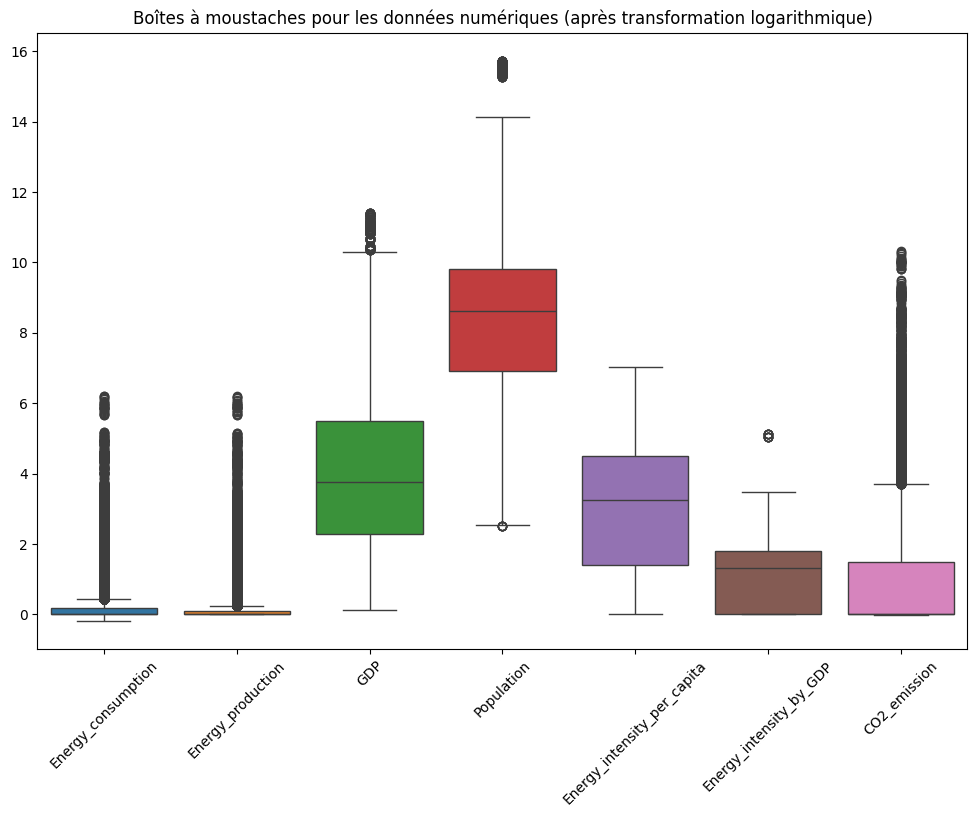

In [14]:
# logarithm for scale adapting
training_data_log = training_data_cleaned[numeric_columns].apply(lambda x: np.log1p(x))

plt.figure(figsize=(12, 8))
sns.boxplot(data=training_data_log)
plt.title('Boîtes à moustaches pour les données numériques (après transformation logarithmique)')
plt.xticks(rotation=45)
plt.show()


Variabilité : La taille de chaque boîte et des moustaches montre à quel point les valeurs d’une variable sont dispersées. Une boîte plus étroite indique une variabilité moindre autour de la médiane, tandis qu’une boîte plus large indique une dispersion plus importante.
Symétrie et asymétrie : Si la médiane est centrée dans la boîte et que les moustaches sont de longueur similaire, cela indique une distribution relativement symétrique. Si la médiane est décalée, ou si une moustache est plus longue, cela indique une distribution asymétrique.
Présence de valeurs extrêmes : Les points en dehors des moustaches montrent des valeurs qui diffèrent significativement de la majorité des données, souvent appelées valeurs aberrantes.

2. Inspection of test data

In [15]:
# List of drop column
cols_to_drop = ['Id']
# drop column
test_data_cleaned = test_data.drop(columns=cols_to_drop)
# Stats clean data
print(test_data_cleaned.describe())

               Year  Energy_consumption  Energy_production            GDP  \
count  15624.000000        13008.000000       13010.000000   13752.000000   
mean    2013.854839            1.929919           1.917937    1060.187526   
std        3.257091           19.244037          19.005439    7765.955133   
min     2008.000000           -0.071121           0.000000       0.173602   
25%     2011.000000            0.000230           0.000000      14.524925   
50%     2014.000000            0.034384           0.001638      64.631200   
75%     2017.000000            0.290209           0.153078     320.639275   
max     2019.000000          601.040490         611.508969  127690.247059   

         Population  Energy_intensity_per_capita  Energy_intensity_by_GDP  \
count  1.377000e+04                 14796.000000             14796.000000   
mean   7.050658e+04                    79.145963                 3.725318   
std    5.198154e+05                   110.146662                 2.735564  

In [16]:
# missing values 
missing_values = test_data.isnull().sum()
print(missing_values[missing_values > 0])

Energy_consumption             2616
Energy_production              2614
GDP                            1872
Population                     1854
Energy_intensity_per_capita     828
Energy_intensity_by_GDP         828
CO2_emission                    412
dtype: int64


In [17]:
# Print the age % of NaN values
energy_nan_percent = test_data['Energy_consumption'].isna().mean() * 100
print(f"Il y a {energy_nan_percent:.2f}% de valeur pour Energy_consumption manquante")
energy_production_nan_percent = test_data['Energy_production'].isna().mean() * 100
print(f"Il y a {energy_production_nan_percent:.2f}% de valeur pour Energy_production manquante")
gdp_nan_percent = test_data['GDP'].isna().mean() * 100
print(f"Il y a {gdp_nan_percent:.2f}% de valeur pour GDP manquante")
population_nan_percent = test_data['Population'].isna().mean() * 100
print(f"Il y a {population_nan_percent:.2f}% de valeur pour Population manquante")
Energy_intensity_per_capita_nan_percent = test_data['Energy_intensity_per_capita'].isna().mean() * 100
print(f"Il y a {Energy_intensity_per_capita_nan_percent:.2f}% de valeur pour Energy_intensity_per_capita manquante")
Energy_intensity_by_GDP_nan_percent = test_data['Energy_intensity_by_GDP'].isna().mean() * 100
print(f"Il y a {Energy_intensity_by_GDP_nan_percent:.2f}% de valeur pour Energy_intensity_by_GDP manquante")
CO2_emission_nan_percent = test_data['CO2_emission'].isna().mean() * 100
print(f"Il y a {CO2_emission_nan_percent:.2f}% de valeur pour CO2_emission manquante")

Il y a 16.74% de valeur pour Energy_consumption manquante
Il y a 16.73% de valeur pour Energy_production manquante
Il y a 11.98% de valeur pour GDP manquante
Il y a 11.87% de valeur pour Population manquante
Il y a 5.30% de valeur pour Energy_intensity_per_capita manquante
Il y a 5.30% de valeur pour Energy_intensity_by_GDP manquante
Il y a 2.64% de valeur pour CO2_emission manquante


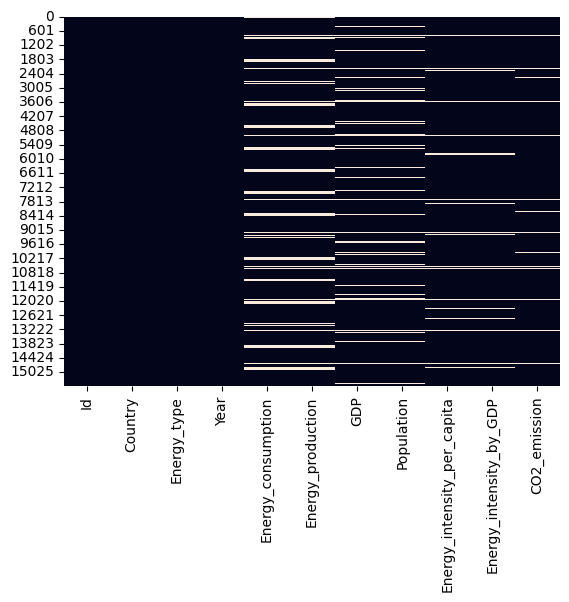

In [18]:
# visualize missing values
sns.heatmap(test_data.isnull(), cbar=False)
plt.show()

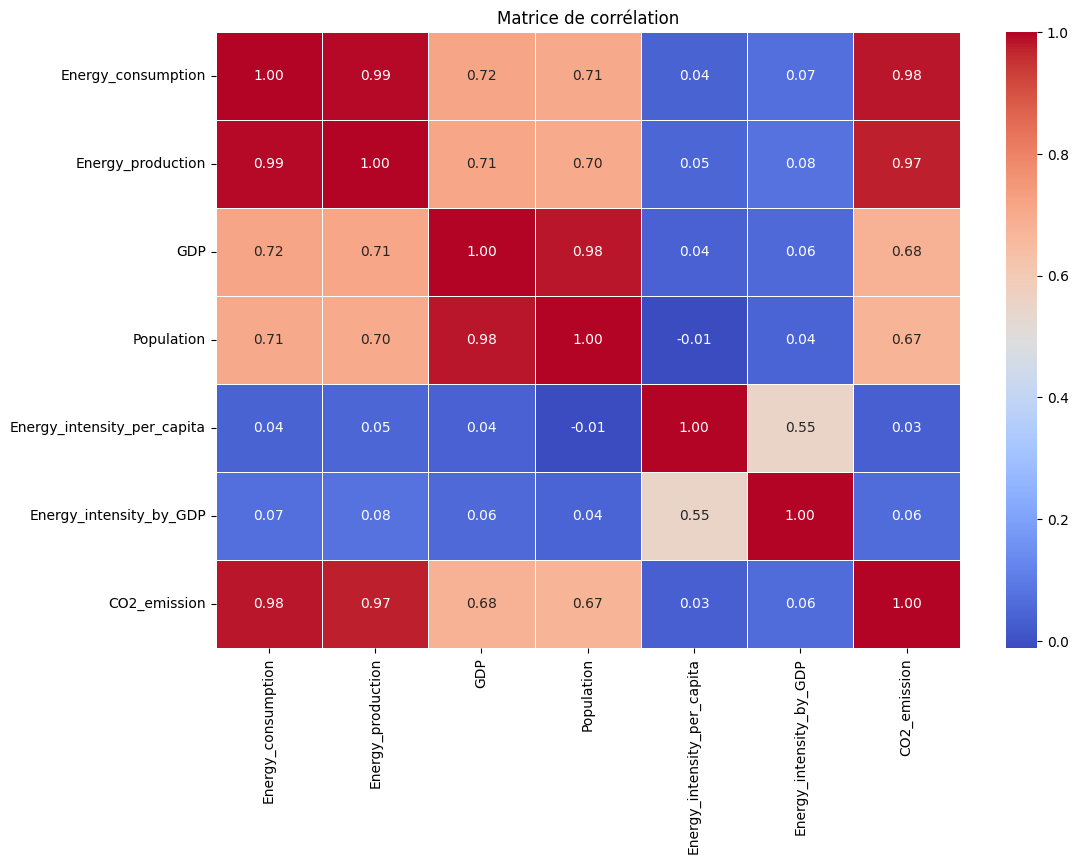

In [19]:
# Calcul of correlations
correlation_matrix = test_data_cleaned[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()


La matrice de corrélation montre la corrélation entre les différentes variables. Les couleurs indiquent la force de la corrélation (positive ou négative). Elle me permet de voir la force et la direction des relations entre les différentes mesures comme la consommation d'énergie, les émissions de CO₂, le PIB, et la population des pays. Par exemple, je remarque une forte corrélation positive entre la consommation d'énergie et les émissions de CO₂, ce qui suggère que plus un pays consomme d'énergie, plus il émet de CO₂. Cela confirme le lien direct entre les deux variables et leur impact environnemental.

J’ai également noté la corrélation entre la population et la consommation énergétique, qui indique que des pays plus peuplés tendent à consommer davantage d’énergie. Cette visualisation m’aide à identifier les variables qui apportent des informations similaires, ce qui sera utile pour éviter la redondance de données dans mon modèle de clustering K-Means

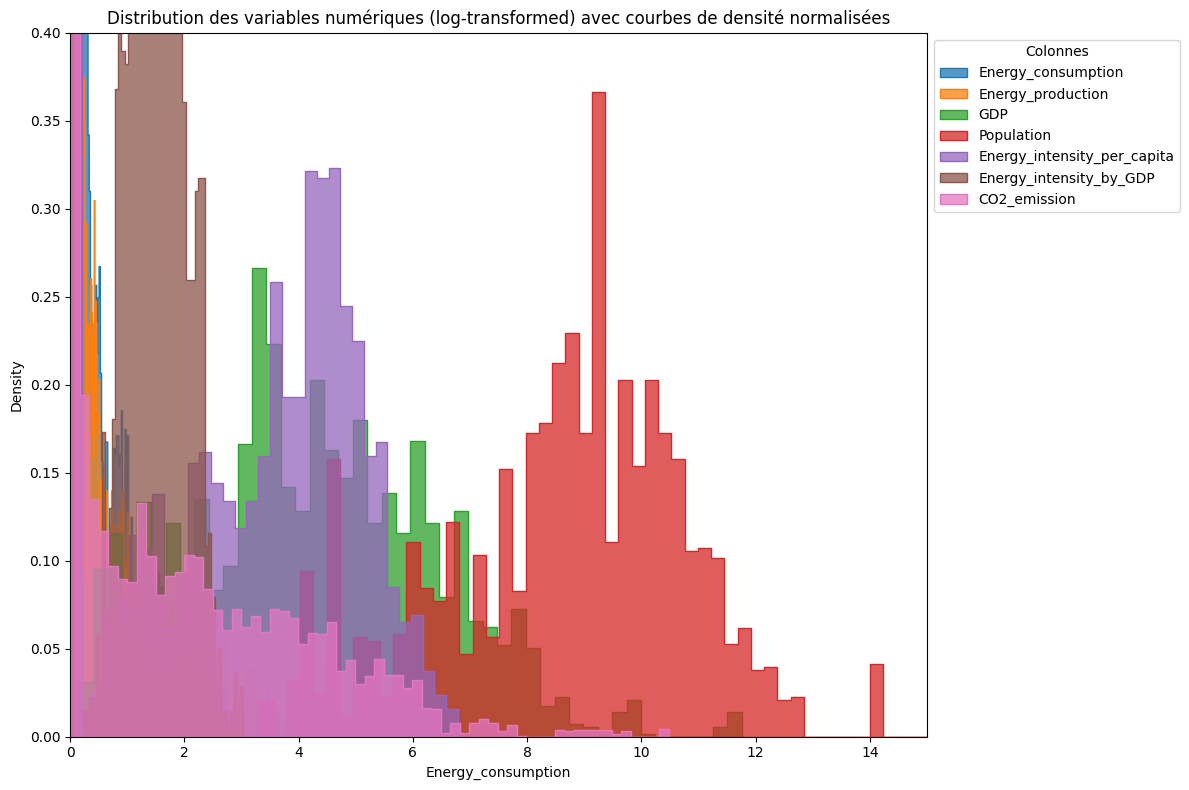

In [20]:
# List of column for distribution analysing
numeric_columns = ['Energy_consumption', 'Energy_production', 'GDP', 'Population', 
                   'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']

test_data_log = test_data[numeric_columns].apply(lambda x: np.log1p(x))

plt.figure(figsize=(12, 8))

for col in numeric_columns:
    sns.histplot(test_data_log[col], kde=False, label=col, stat='density', element='step')

plt.xlim(0, 15) 
plt.ylim(0, 0.4) 
plt.title('Distribution des variables numériques (log-transformed) avec courbes de densité normalisées')
plt.legend(title="Colonnes", bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout() 
plt.show()

Interprétation de la densité
Grande densité : Une grande densité (zone plus haute sur l'axe vertical) signifie qu'il y a une forte concentration de valeurs dans cette plage. Autrement dit, de nombreuses observations ont des valeurs log-transformées similaires. Par exemple, si la variable de la population a une grande densité autour d'une certaine valeur, cela indique que beaucoup de pays dans le dataset ont une population proche de cette valeur.

Petite densité : Une faible densité (zone basse ou proche de zéro) indique que peu d'observations se trouvent dans cette plage de valeurs. Cela signifie que la plupart des pays ou entités ont des valeurs différentes (généralement plus basses ou plus élevées). Par exemple, une faible densité pour Energy_intensity_by_GDP dans une certaine plage indique que peu de pays ont cette intensité énergétique.

Ce que le graphique révèle
Distribution des valeurs : Les pics et les zones de haute densité montrent où se situent les valeurs les plus fréquentes pour chaque variable. Par exemple, si les émissions de CO2 montrent une densité élevée dans les valeurs basses, cela indique que la majorité des pays émettent peu de CO2 (après transformation log).

Comparaison entre variables : Ce graphique permet de voir comment les distributions des différentes variables se chevauchent et diffèrent. Par exemple, on peut voir si certaines variables, comme la consommation d'énergie, suivent des tendances similaires ou si elles sont distribuées différemment dans le dataset.

In [21]:
# data cleaning :
test_data_cleaned = test_data.dropna()

In [22]:
# OneHotEncoder from Scikit-learn for transform Energy_type column in binary variable
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
energy_type_encoded = encoder.fit_transform(test_data[['Energy_type']])
energy_type_encoded_df = pd.DataFrame(energy_type_encoded, columns=encoder.categories_[0])

# Concatenation with the other dataframe column
training_data_cleaned = pd.concat([test_data.drop(columns=['Energy_type']), energy_type_encoded_df], axis=1)



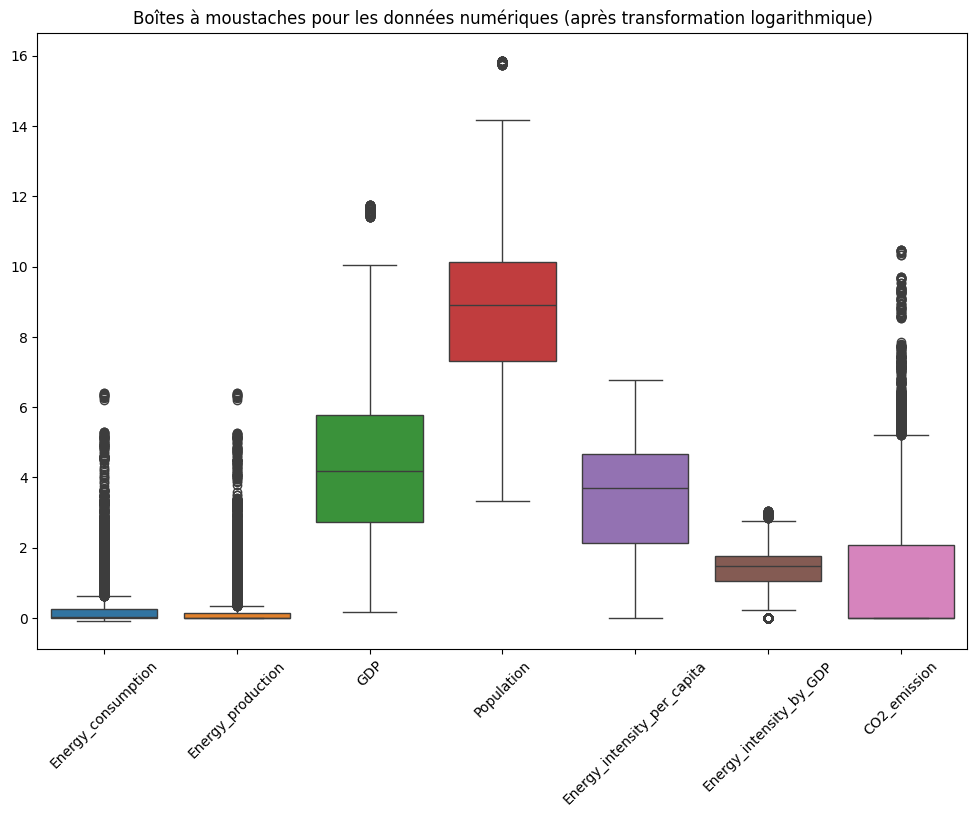

In [23]:
# logarithm for scale adapting
training_data_log = training_data_cleaned[numeric_columns].apply(lambda x: np.log1p(x)) 

plt.figure(figsize=(12, 8))
sns.boxplot(data=training_data_log)
plt.title('Boîtes à moustaches pour les données numériques (après transformation logarithmique)')
plt.xticks(rotation=45)
plt.show()



Variabilité : La taille de chaque boîte et des moustaches montre à quel point les valeurs d’une variable sont dispersées. Une boîte plus étroite indique une variabilité moindre autour de la médiane, tandis qu’une boîte plus large indique une dispersion plus importante.
Symétrie et asymétrie : Si la médiane est centrée dans la boîte et que les moustaches sont de longueur similaire, cela indique une distribution relativement symétrique. Si la médiane est décalée, ou si une moustache est plus longue, cela indique une distribution asymétrique.
Présence de valeurs extrêmes : Les points en dehors des moustaches montrent des valeurs qui diffèrent significativement de la majorité des données, souvent appelées valeurs aberrantes.